In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file = '..//data//nsduh_selected.csv'
main_data = pd.read_csv(file, sep=',')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [6]:
x = main_data.drop('RISKGR',axis=1)
y = main_data['RISKGR']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

In [22]:
df_train = pd.DataFrame(y_train)
df_train.groupby('RISKGR').groups
# main_data.head()

{0: Int64Index([44430, 12595, 22049, 44109, 54722, 19345, 18298, 41801, 38675,
             17793,
             ...
              4391,  8678, 48111, 32820, 33716, 19198, 30754, 36351, 37333,
             11586],
            dtype='int64', length=15619),
 1: Int64Index([51587, 47581, 42403, 12862, 14754, 14676, 28945,  6922, 52089,
             31177,
             ...
              9523, 30558, 25399,  7225, 44547, 22582, 29280, 24915, 54964,
             28148],
            dtype='int64', length=13631),
 2: Int64Index([53020,  9654, 37439, 26126, 39541, 32172, 50856, 41209,  6069,
              8217,
             ...
             49037, 22388, 29651,  9944,  1099,  4073, 31710, 43068, 26670,
             51265],
            dtype='int64', length=10143)}

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
cv_test = StratifiedKFold(n_splits=10)
cv_test

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [11]:
rfc_model = RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.3, min_samples_leaf=18,
                                   min_samples_split=19, n_estimators=100)

predictions = cross_val_predict(rfc_model, x,y, cv=StratifiedKFold(n_splits=10))
# score = cross_val_score(rfc_model, x, y, scoring='accuracy', cv = 10)
# rfc_accuracy = score.mean() * 100

In [12]:
score = cross_val_score(rfc_model, x, y, scoring='accuracy', cv = StratifiedKFold(n_splits=10))
rfc_accuracy = score.mean() * 100

In [17]:
rfc_accuracy

78.37090181480593

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
# print("Random Forest accuracy: {}".format(rfc_accuracy))
# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))

print("Random Forest accuracy: {}".format(rfc_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

Random Forest accuracy: 78.37090181480593
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     22301
           1       0.67      0.76      0.71     19467
           2       0.69      0.55      0.61     14508

   micro avg       0.78      0.78      0.78     56276
   macro avg       0.77      0.75      0.76     56276
weighted avg       0.78      0.78      0.78     56276

[[21251  1007    43]
 [ 1076 14789  3602]
 [  163  6332  8013]]


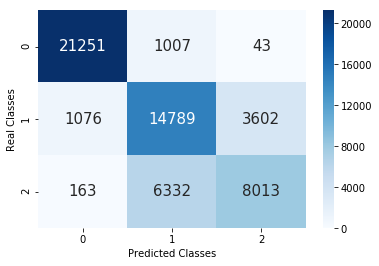

In [15]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('..//images//confusion_rfc.jpg', dpi = 300)